# Llenado del tanque

## Sistema en lazo abierto 

### CASO 1: válvula on-off (flujo cte. o nulo).

$\begin{equation*}
		\begin{split}
			&\text{Entrada:} \hspace{0.5cm} q(t) = Q, \, t \geq 0 \\
			&\text{Modelo:} \hspace{0.5cm} h(t) = \frac{1}{A}\int_{0}^{t}q(\tau)d\tau \\
			&\text{Comportamiento previsto:} \hspace{0.5cm} h(t)=\frac{Q}{A}t+h_0
		\end{split}
	\end{equation*}$
    
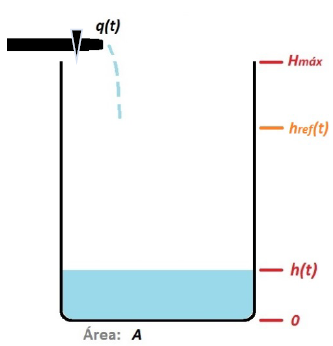 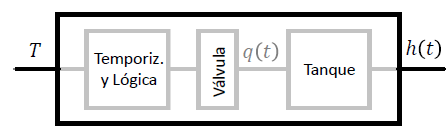

**Idea para la resolución:** Según la curva de llenado obtenida a partir del modelo, se puede calcular el tiempo $T_{ref}$ que demora en llegarse hasta $h_{ref}$ y poner un temporizador en la válvula tal que corte el flujo en $t=T_{ref}=h_{ref}A/Q$.

¿Qué inconveniente creen que podría darse en esta configuración?

[0.2 0.7 1.2 1.7 2.2 2.2 2.2 2.2 2.2 2.2 2.2]


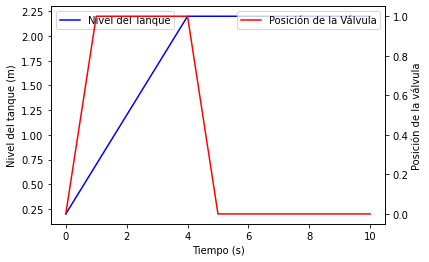

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los parámetros de simulación
T  = 10 # Tiempo de simulación en segundos
dt = 1  # Paso de simulación en segundos

# Parámetros del tanque
A   = 2 # m^2
Q   = 1 # m^3/s
h_r = 2 # m
T_r = h_r*A/Q # seg

# Condición incial de la altura del tanque
H0  = 0.2 # m

# Arreglos para el guardado de datos
N = int(T/dt) + 1
h = np.zeros(N)
h[0] = H0
v = np.zeros(N)

# Simular el llenado del tanque con una válvula on-off
for n in range(1, N):
    # Calcular la posición de la válvula en función del tiempo
    if n >= int(T_r/dt) + 1:
        v[n] = 0  # la válvula se cierra cuando alcanza el T_r
    else:
        v[n] = 1  # la válvula se mantiene abierta si t<T_r
    
    # Flujo a través de la válvula
    q = Q*v[n]
    
    # Cambio en el nivel del tanque
    dh = q/A*dt
    
    # Actualización del nivel del tanque
    h[n] = h[n-1] + dh
    
print(h)        
# Plot tank level and valve position    
t = np.linspace(0, T, N)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(t, h, 'b-', label='Nivel del Tanque')
ax2.plot(t, v, 'r-', label='Posición de la Válvula')
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Nivel del tanque (m)')
ax2.set_ylabel('Posición de la válvula')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

## Sistema en lazo cerrado

### CASO 2: válvula on-off (flujo cte. o nulo).

$   \begin{equation*}
    	\text{Entrada:} \hspace{.5cm} q(t)= K_1 (h_{ref}-h(t)), t\geq 0
    \end{equation*}$

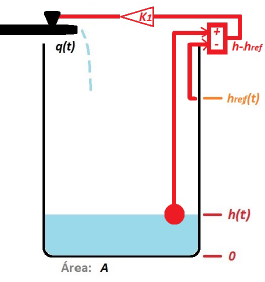
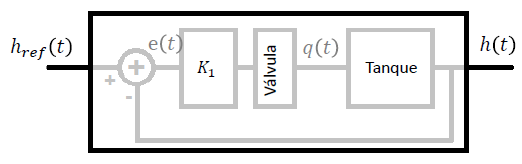

[0.         1.2        1.68       1.872      1.9488     1.97952
 1.991808   1.9967232  1.99868928 1.99947571 1.99979028]


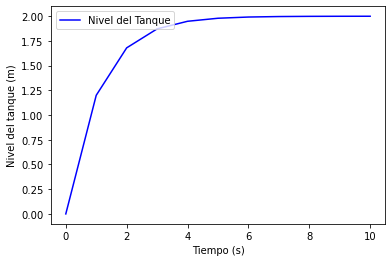

In [11]:
# Definir los parámetros de simulación
T  = 10 # Tiempo de simulación en segundos
dt = 1  # Paso de simulación en segundos

# Parámetros del tanque
A   = 2 # m^2
Q   = 1 # m^3/s
h_r = 2 # m
T_r = h_r*A/Q # seg

# Condición incial de la altura del tanque
H0  = 0 # m

# Parámetros del controlador
K = 1.2

# Arreglos para el guardado de datos
N = int(T/dt) + 1
h = np.zeros(N)
h[0] = H0
v = np.zeros(N)

# Simular el llenado del tanque con una válvula on-off
for n in range(1, N):
    # Flujo a través de la válvula
    q = K*(h_r - h[n-1])
    
    # Calcular el cambio en el nivel del tanque
    dh = q/A*dt
    
    # Actualizar el nivel del tanque
    h[n] = h[n-1] + dh
    
print(h)        
# Plot tank level and valve position    
t = np.linspace(0, T, N)
fig, ax1 = plt.subplots()
ax1.plot(t, h, 'b-', label='Nivel del Tanque')
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Nivel del tanque (m)')
ax1.legend(loc='upper left')
plt.show()
